<a href="https://colab.research.google.com/github/raianegoncalves/back-end-python/blob/main/C%C3%B3pia_de_Grupo_Frequ%C3%AAncias_e_medidas_Squad_Jill_Tarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat
### ler arquivo zip
import os
import zipfile

## Abrir o arquivo

Clicar no link para baixar o arquivo na sua máquina https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/download?datasetVersionNumber=1

In [ ]:
#Ao rodar o código, clicar em "Esolher arquivos" para importar o zip que você baixou
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
# Nome do arquivo ZIP que foi enviado
zip_filename = 'archive.zip'

# Caminho onde os arquivos do zip serão extraídos
extract_path = '/content/unzipped_files'

# Criar o diretório de extração se não existir
os.makedirs(extract_path, exist_ok=True)

# Descompactar o arquivo ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    # Listar todos os arquivos dentro do ZIP
    zip_ref.printdir()

    # Extrair todos os arquivos para o diretório especificado
    zip_ref.extractall(extract_path)

print(f"Arquivos extraídos para {extract_path}")

File Name                                             Modified             Size
StudentsPerformance.csv                        2019-10-11 12:48:02        72036
Arquivos extraídos para /content/unzipped_files


In [ ]:
# Listar arquivos e pastas no diretório de extração
extracted_files = os.listdir(extract_path)
print(extracted_files)

['StudentsPerformance.csv']


## Leitura dos dados

In [ ]:
# Nome do arquivo CSV extraído
data = json_filename = os.path.join(extract_path, 'StudentsPerformance.csv')

In [ ]:
#Ler o arquivo csv
df = pd.read_csv(data)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exercício 1

###1. Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exercício 2

###2. Alguma variável precisa ser alterada ou criada? Faça as alterações que julgar necessárias.

In [ ]:
#alterar nomes das colunas para português

novas_cols = {'gender' : 'gênero',
              'race/ethnicity' : 'raça/etnia',
              'parental level of education' : 'nível de educação parental',
              'lunch' : 'almoço',
              'test preparation course' : 'curso preparatório para teste',
              'math score' : 'nota de matemática',
              'reading score' : 'nota de leitura',
              'writing score' : 'nota de escrita'
              }
df.rename(columns=novas_cols, inplace=True)
df.head()

,gênero,raça/etnia,nível de educação parental,almoço,curso preparatório para teste,nota de matemática,nota de leitura,nota de escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
traducoes = {
    "male": "masculino",
    "female": "feminino",
    "group A": "grupo A",
    "group B": "grupo B",
    "group C": "grupo C",
    "group D": "grupo D",
    "group E": "grupo E",
    "some college": "cursando graduação",
    "associate's degree": "tecnólogo",
    "high school": "ensino médio",
    "some high school": "cursando ensino médio",
    "bachelor's degree": "bacharelado",
    "master's degree": "mestrado",
    "standard": "padrão",
    "free/reduced": "livre/reduzido",
    "none": "inexistente",
    "completed": "completo"
}

df = df.replace(traducoes)
df.head()

,gênero,raça/etnia,nível de educação parental,almoço,curso preparatório para teste,nota de matemática,nota de leitura,nota de escrita
0,feminino,grupo B,bacharelado,padrão,inexistente,72,72,74
1,feminino,grupo C,cursando graduação,padrão,completo,69,90,88
2,feminino,grupo B,mestrado,padrão,inexistente,90,95,93
3,masculino,grupo A,tecnólogo,livre/reduzido,inexistente,47,57,44
4,masculino,grupo C,cursando graduação,padrão,inexistente,76,78,75


In [ ]:
df['media geral'] = round(((df['nota de matemática'] + df['nota de leitura'] + df['nota de escrita']) / 3), 2)
df.head()

,gênero,raça/etnia,nível de educação parental,almoço,curso preparatório para teste,nota de matemática,nota de leitura,nota de escrita,media geral
0,feminino,grupo B,bacharelado,padrão,inexistente,72,72,74,72.67
1,feminino,grupo C,cursando graduação,padrão,completo,69,90,88,82.33
2,feminino,grupo B,mestrado,padrão,inexistente,90,95,93,92.67
3,masculino,grupo A,tecnólogo,livre/reduzido,inexistente,47,57,44,49.33
4,masculino,grupo C,cursando graduação,padrão,inexistente,76,78,75,76.33


In [ ]:
df[['nota de matemática','nota de leitura','nota de escrita']].median()

,0
nota de matemática,66.0
nota de leitura,70.0
nota de escrita,69.0


##Exercício 3

###3. Verifique a quantidade de alunos em cada grupo racial/étnico.




In [ ]:
racial_grupo = df.groupby(['raça/etnia']).size()
racial_grupo

,0
raça/etnia,
grupo A,89
grupo B,190
grupo C,319
grupo D,262
grupo E,140


##Exercício 4

###4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
genero = df.groupby(['gênero']).size()
masculino = genero['masculino']
feminino = genero['feminino']

print(f'São {feminino} alunos do gênero feminino e {masculino} alunos do gênero masculino, portanto há mais alunos do gênero feminino.')

São 518 alunos do gênero feminino e 482 alunos do gênero masculino, portanto há mais alunos do gênero feminino.


## Exercício 5

###5. Analise as notas de matemática dos alunos da forma mais completa possível.

#### Possíveis formas de analisar variáveis numéricas:
##### 1. Média, mediana, moda
##### 2. Variância e desvio padrão
##### 3. Valores mínimos e máximos
##### 4. Análise do histograma
##### 5. Análise do boxplot
##### 6. Verificar outliers
##### 7. Verificar valores nulos ou faltantes


###Média, Moda e Mediana Geral

In [ ]:
#MÉDIA DE MATEMÁTICA
media_math = round((df['nota de matemática'].mean()), 2)

print(f"Média das notas de matemática: {media_math}")

Média das notas de matemática: 66.09


In [ ]:
#ACHO QUE ESSA CÉDULA PODEMOS JOGAR PRO ÚLTIMO EXERCÍCIO, O QUE ACHAM? PQ ELA AVALIA GERAL, E ESSE
# EXERCÍCIO PEDE APENAS OS CÁLCULOS DE MATEMÁTICA
# DEIXEI EM UMA CÉDULA ACIMA O EXEMPLO.

#MÉDIA
media_math = round((df['nota de matemática'].mean()), 2)
media_reading = round((df['nota de leitura'].mean()), 2)
media_writing = round((df['nota de escrita'].mean()), 2)

#RESULTADOS
print(f"Média das notas de matemática: {media_math}")
print(f"Média das notas de leitura: {media_reading}")
print(f"Média das notas de escrita: {media_writing}")

Média das notas de matemática: 66.09
Média das notas de leitura: 69.17
Média das notas de escrita: 68.05


In [ ]:
#MODA DE MATEMÁTICA
moda_math = df['nota de matemática'].mode()[0]

print(f"Moda das notas de matemática: {moda_math}")

Moda das notas de matemática: 65


In [ ]:
#ACHO QUE ESSA CÉDULA PODEMOS JOGAR PRO ÚLTIMO EXERCÍCIO, O QUE ACHAM? PQ ELA AVALIA GERAL, E ESSE
# EXERCÍCIO PEDE APENAS OS CÁLCULOS DE MATEMÁTICA
# DEIXEI EM UMA CÉDULA ACIMA O EXEMPLO.

#MODA
moda_math = df['nota de matemática'].mode()[0]
moda_reading = df['nota de leitura'].mode()[0]
moda_writing = df['nota de escrita'].mode()[0]

#RESULTADOS
print(f"Moda das notas de matemática: {moda_math}")
print(f"Moda das notas de leitura: {moda_reading}")
print(f"Moda das notas de escrita: {moda_writing}")

Moda das notas de matemática: 65
Moda das notas de leitura: 72
Moda das notas de escrita: 74


In [ ]:
#MEDIANA DE MATEMÁTICA
mediana_math = df['nota de matemática'].median()

print(f"Mediana das notas de matemática: {mediana_math}")

Mediana das notas de matemática: 66.0


In [ ]:
#ACHO QUE ESSA CÉDULA PODEMOS JOGAR PRO ÚLTIMO EXERCÍCIO, O QUE ACHAM? PQ ELA AVALIA GERAL, E ESSE
# EXERCÍCIO PEDE APENAS OS CÁLCULOS DE MATEMÁTICA
# DEIXEI EM UMA CÉDULA ACIMA O EXEMPLO.

#MEDIANA
mediana_math = df['nota de matemática'].median()
mediana_reading = df['nota de leitura'].median()
mediana_writing = df['nota de escrita'].median()

#RESULTADOS
print(f"Mediana das notas de matemática: {mediana_math}")
print(f"Mediana das notas de leitura: {mediana_reading}")
print(f"Mediana das notas de escrita: {mediana_writing}")

Mediana das notas de matemática: 66.0
Mediana das notas de leitura: 70.0
Mediana das notas de escrita: 69.0


##Média, Moda, Mediana, Desvio Padrão, Variância, Máximo e Mínimo por Raça / Etnia

In [ ]:
#MÉDIA, MEDIANA, MODA, DESVIO PADRÃO, VARIÂNCIA, MÍNIMO E MÁXIMO POR GRUPO
math_por_etnia = df.groupby('raça/etnia')['nota de matemática'].agg(['count','mean','median',lambda x: pd.Series.mode(x)[0],'std','var','min','max',lambda x: pd.Series(x).quantile([0.25]),lambda x: pd.Series(x).quantile([0.75])])


#RESULTADOS
math_por_etnia.rename(columns={'mean': 'Média','median':'Mediana','<lambda_0>':'Moda','std':'Desvio Padrão','var':'Variância','min':'Mínimo','max':'Máximo','<lambda_1>':'quartil_25','<lambda_2>':'quartil_75'})

,count,Média,Mediana,Moda,Desvio Padrão,Variância,Mínimo,Máximo,quartil_25,quartil_75
raça/etnia,,,,,,,,,,
grupo A,89,61.629213,61.0,53,14.523008,210.917773,28,100,51.00,71.0
grupo B,190,63.452632,63.0,58,15.468191,239.264940,8,97,54.00,74.0
grupo C,319,64.463950,65.0,65,14.852666,220.601684,0,98,55.00,74.0
grupo D,262,67.362595,69.0,69,13.769386,189.595990,26,100,59.00,77.0
grupo E,140,73.821429,74.5,68,15.534259,241.313207,30,100,64.75,85.0


##Média, Moda, Mediana, Desvio Padrão, Variância, Máximo e Mínimo por Gênero

In [ ]:
#MÉDIA, MEDIANA, MODA, DESVIO PADRÃO, VARIÂNCIA, MÍNIMO E MÁXIMO POR GÊNERO
math_por_genero = df.groupby('gênero')['nota de matemática'].agg(['count','mean','median',lambda x: pd.Series.mode(x)[0],'std','var','min','max',lambda x: pd.Series(x).quantile([0.25]),lambda x: pd.Series(x).quantile([0.75])])


#RESULTADOS
math_por_genero.rename(columns={'mean': 'Média','median':'Mediana','<lambda_0>':'Moda','std':'Desvio Padrão','var':'Variância','min':'Mínimo','max':'Máximo','<lambda_1>':'quartil_25','<lambda_2>':'quartil_75'})

,count,Média,Mediana,Moda,Desvio Padrão,Variância,Mínimo,Máximo,quartil_25,quartil_75
gênero,,,,,,,,,,
feminino,518,63.633205,65.0,65,15.491453,239.985124,0,100,54.0,74.0
masculino,482,68.728216,69.0,62,14.356277,206.102695,27,100,59.0,79.0


##Média, Moda, Mediana, Desvio Padrão, Variância, Máximo e Mínimo por Nível de Educação Parental

In [ ]:
#MÉDIA, MEDIANA, MODA, DESVIO PADRÃO, VARIÂNCIA, MÍNIMO E MÁXIMO POR NÍVEL DE EDUCAÇÃO PARENTAL
math_por_nivel_educacao_parental = df.groupby('nível de educação parental')['nota de matemática'].agg(['count','mean','median',lambda x: pd.Series.mode(x)[0],'std','var','min','max',lambda x: pd.Series(x).quantile([0.25]),lambda x: pd.Series(x).quantile([0.75])])


#RESULTADOS
math_por_nivel_educacao_parental.rename(columns={'mean': 'Média','median':'Mediana','<lambda_0>':'Moda','std':'Desvio Padrão','var':'Variância','min':'Mínimo','max':'Máximo','<lambda_1>':'quartil_25','<lambda_2>':'quartil_75'})

,count,Média,Mediana,Moda,Desvio Padrão,Variância,Mínimo,Máximo,quartil_25,quartil_75
nível de educação parental,,,,,,,,,,
bacharelado,118,69.389831,68.0,63,14.943789,223.316819,29,100,61.00,79.0
cursando ensino médio,179,63.497207,65.0,59,15.927989,253.700835,0,97,53.00,74.0
cursando graduação,226,67.128319,67.5,69,14.312897,204.859017,19,100,59.00,76.0
ensino médio,196,62.137755,63.0,57,14.539651,211.401439,8,99,53.75,72.0
mestrado,59,69.745763,73.0,79,15.153915,229.641146,40,95,55.50,81.0
tecnólogo,222,67.882883,67.0,65,15.112093,228.375362,26,100,57.00,80.0


##Média, Moda, Mediana, Desvio Padrão, Variância, Máximo e Mínimo por Curso preparatório para teste

In [ ]:
#MÉDIA, MEDIANA, MODA, DESVIO PADRÃO, VARIÂNCIA, MÍNIMO E MÁXIMO POR CURSO PREPARATÓRIO PARA TESTE
math_por_curso_preparatorio = df.groupby('curso preparatório para teste')['nota de matemática'].agg(['count','mean','median',lambda x: pd.Series.mode(x)[0],'std','var','min','max',lambda x: pd.Series(x).quantile([0.25]),lambda x: pd.Series(x).quantile([0.75])])


#RESULTADOS
math_por_curso_preparatorio.rename(columns={'mean': 'Média','median':'Mediana','<lambda_0>':'Moda','std':'Desvio Padrão','var':'Variância','min':'Mínimo','max':'Máximo','<lambda_1>':'quartil_25','<lambda_2>':'quartil_75'})

,count,Média,Mediana,Moda,Desvio Padrão,Variância,Mínimo,Máximo,quartil_25,quartil_75
curso preparatório para teste,,,,,,,,,,
completo,358,69.695531,69.0,65,14.444699,208.649336,23,100,60.0,79.00
inexistente,642,64.077882,64.0,62,15.192376,230.808278,0,100,54.0,74.75


## Gráficos de matemática

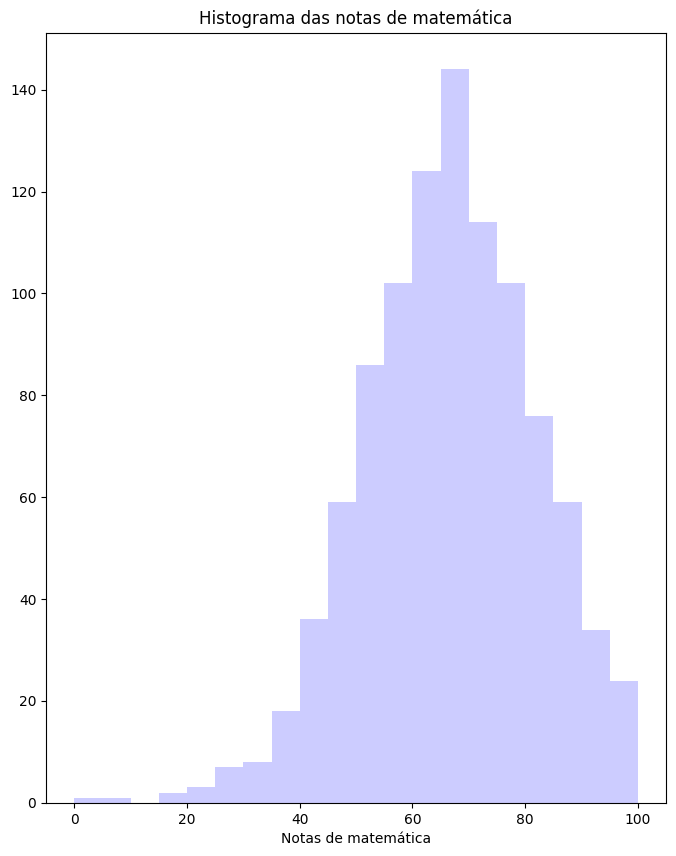

In [ ]:
# hitograma que reflete as notas de matemática.
plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df['nota de matemática'], bins=20, color='blue', alpha=0.2, label='nota de matemática')
plt.xlabel('Notas de matemática')
plt.title('Histograma das notas de matemática')
plt.show()

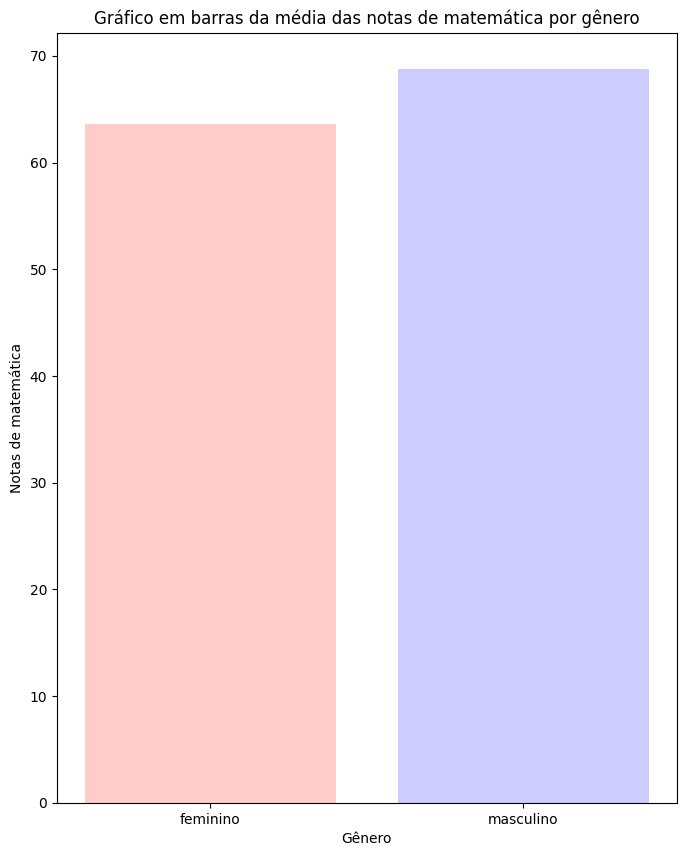

In [ ]:
# gráfico com a média das notas por gênero.
plt.rcParams['figure.figsize'] = [8, 10]

media_mat_genero = df.groupby(['gênero'])[['nota de matemática']].mean()
media_mat_genero_labels = media_mat_genero.index
media_notas = media_mat_genero.values.flatten()
plt.bar(media_mat_genero_labels, media_notas, alpha=0.2, color=['red', 'blue'])
plt.title('Gráfico em barras da média das notas de matemática por gênero')
plt.ylabel('Notas de matemática')
plt.xlabel('Gênero')
plt.show()

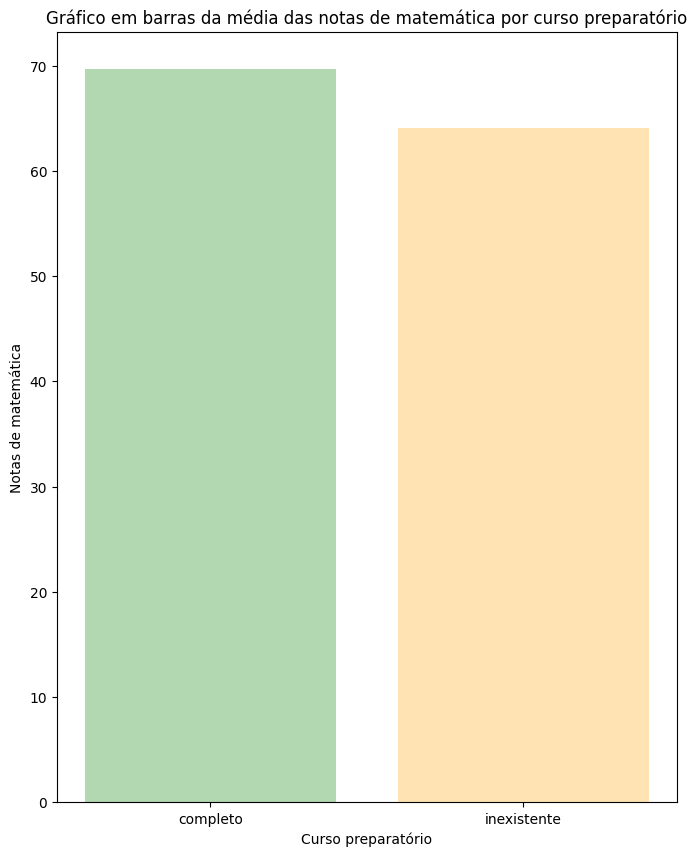

In [ ]:
# gráfico com a média das notas de matemática dos alunos divido em: fez curso preparatório e não fez curso preparatório.

plt.rcParams['figure.figsize'] = [8, 10]

media_mat_genero = df.groupby(['curso preparatório para teste'])[['nota de matemática']].mean()
media_mat_genero_labels = media_mat_genero.index
media_notas = media_mat_genero.values.flatten()
plt.bar(media_mat_genero_labels, media_notas, alpha=0.3, color=['green', 'orange'])
plt.title('Gráfico em barras da média das notas de matemática por curso preparatório')
plt.ylabel('Notas de matemática')
plt.xlabel('Curso preparatório')
plt.show()

In [ ]:
#média das notas de matemática por raça/etnia (gráfico abaixo).

notas_racial_grupo = df.groupby('raça/etnia')['nota de matemática'].mean()
notas_racial_grupo

,nota de matemática
raça/etnia,
grupo A,61.629213
grupo B,63.452632
grupo C,64.463950
grupo D,67.362595
grupo E,73.821429


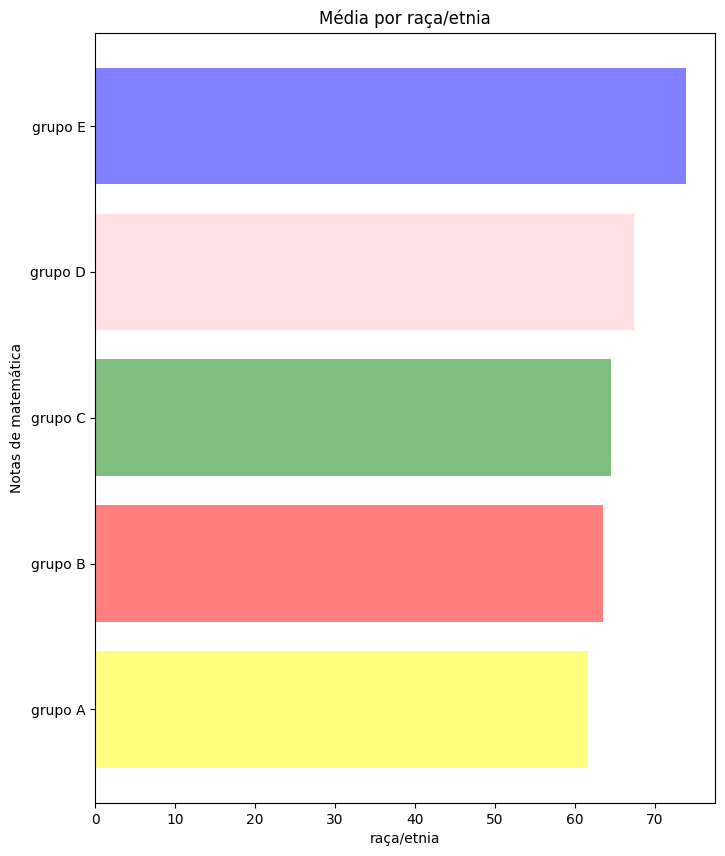

In [ ]:
#gráfico em barras horizontais que reflete os valores da tebela acima.

plt.rcParams['figure.figsize'] = [8, 10]

media_notas_etnia = df.groupby(['raça/etnia'])[['nota de matemática']].mean()
media_notas_etnia_labels = media_notas_etnia.index
media_notas = media_notas_etnia.values.flatten()
plt.barh(media_notas_etnia_labels, media_notas, alpha=0.5, color=['yellow', 'red', 'green', 'pink', 'blue'])

plt.title('Média por raça/etnia')
plt.ylabel('Notas de matemática')
plt.xlabel('raça/etnia')
plt.show()

## Análises Gráficas

###-   Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?
###-   Faça a mesma análise para as notas de leitura e escrita.
###-   Verifique gráficamente a relação da nota de leitura e de escrita.

In [ ]:
media_math_parents = df['nota de matemática'].groupby(df['nível de educação parental']).mean()
media_math_parents

,nota de matemática
nível de educação parental,
bacharelado,69.389831
cursando ensino médio,63.497207
cursando graduação,67.128319
ensino médio,62.137755
mestrado,69.745763
tecnólogo,67.882883


In [ ]:
media_reading_parents = df['nota de leitura'].groupby(df['nível de educação parental']).mean()
media_reading_parents

,nota de leitura
nível de educação parental,
bacharelado,73.000000
cursando ensino médio,66.938547
cursando graduação,69.460177
ensino médio,64.704082
mestrado,75.372881
tecnólogo,70.927928


In [ ]:
media_writing_parents = df['nota de escrita'].groupby(df['nível de educação parental']).mean()
media_writing_parents

,nota de escrita
nível de educação parental,
bacharelado,73.381356
cursando ensino médio,64.888268
cursando graduação,68.840708
ensino médio,62.448980
mestrado,75.677966
tecnólogo,69.896396


In [ ]:
# Convertendo o nível de educação parental para valores numéricos para a visualização
education_levels = {'cursando ensino médio': 1, 'ensino médio': 2, 'tecnólogo': 3, 'cursando graduação' : 4, 'bacharelado' : 5, 'mestrado' : 6}
df_educacao_parental = df['nível de educação parental'].map(education_levels)

##Gráficos de dispersão

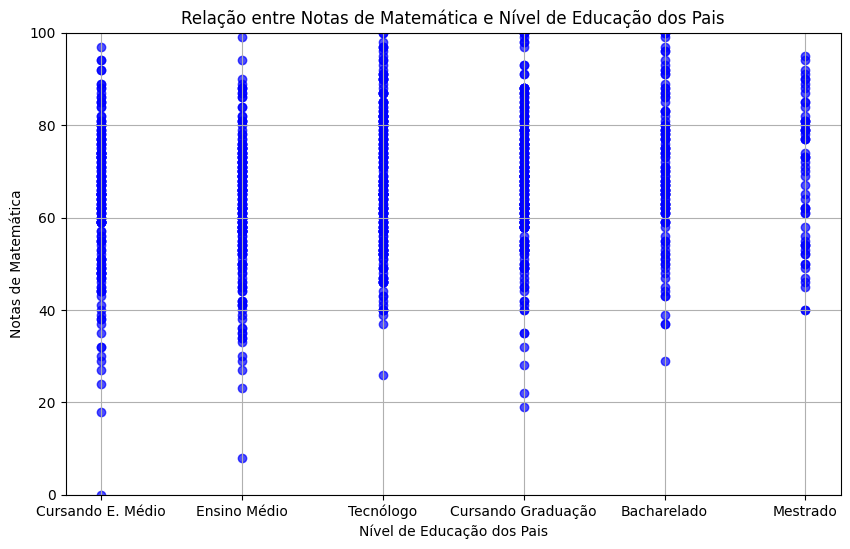

In [ ]:
# Criando o gráfico de dispersão para matemática
plt.figure(figsize=(10, 6))
plt.scatter(df_educacao_parental, df['nota de matemática'], color='blue', alpha=0.7)
plt.title('Relação entre Notas de Matemática e Nível de Educação dos Pais')
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Notas de Matemática')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['Cursando E. Médio', 'Ensino Médio', 'Tecnólogo', 'Cursando Graduação', 'Bacharelado', 'Mestrado'])
plt.ylim(0, 100)
plt.grid(True)
plt.show()

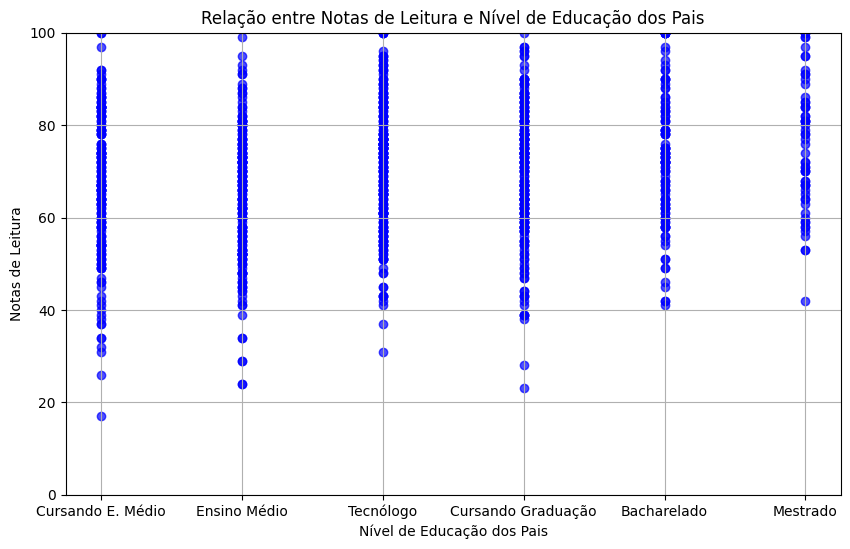

In [ ]:
# Criando o gráfico de dispersão para leitura
plt.figure(figsize=(10, 6))
plt.scatter(df_educacao_parental, df['nota de leitura'], color='blue', alpha=0.7)
plt.title('Relação entre Notas de Leitura e Nível de Educação dos Pais')
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Notas de Leitura')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['Cursando E. Médio', 'Ensino Médio', 'Tecnólogo', 'Cursando Graduação', 'Bacharelado', 'Mestrado'])
plt.ylim(0, 100)
plt.grid(True)
plt.show()

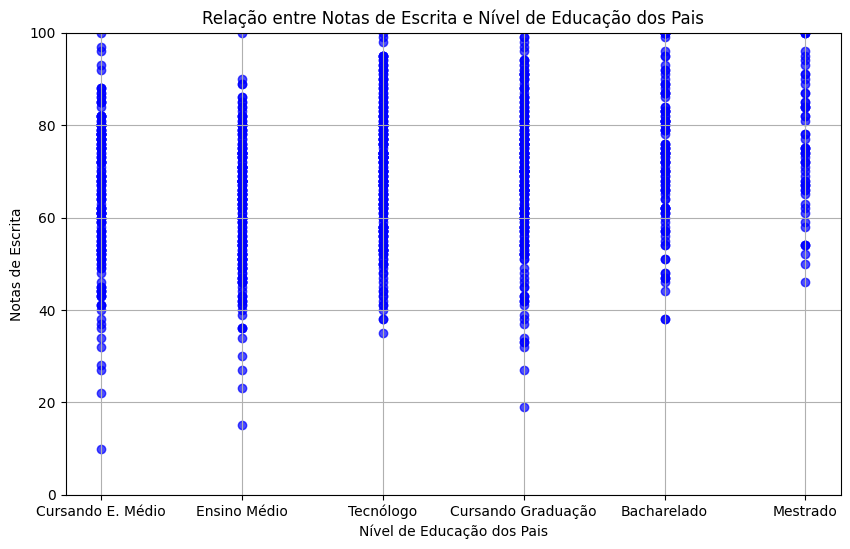

In [ ]:
# Criando o gráfico de dispersão para escrita
plt.figure(figsize=(10, 6))
plt.scatter(df_educacao_parental, df['nota de escrita'], color='blue', alpha=0.7)
plt.title('Relação entre Notas de Escrita e Nível de Educação dos Pais')
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Notas de Escrita')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6], labels=['Cursando E. Médio', 'Ensino Médio', 'Tecnólogo', 'Cursando Graduação', 'Bacharelado', 'Mestrado'])
plt.ylim(0, 100)
plt.grid(True)
plt.show()

##Histogramas

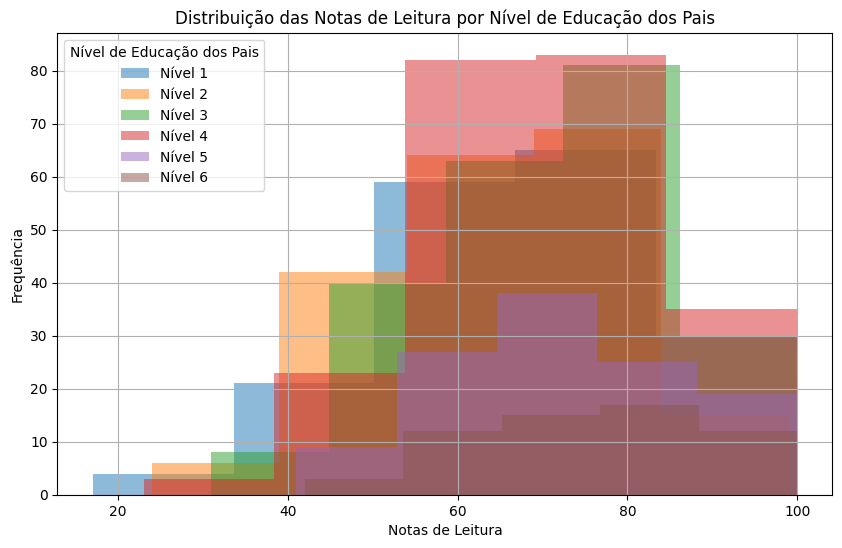

In [ ]:
# Criando o histograma
plt.figure(figsize=(10, 6))
for level in sorted(df_educacao_parental.unique()):
    subset = df[df_educacao_parental == level]
    plt.hist(subset['nota de leitura'], bins=5, alpha=0.5, label=f'Nível {level}')

plt.title('Distribuição das Notas de Leitura por Nível de Educação dos Pais')
plt.xlabel('Notas de Leitura')
plt.ylabel('Frequência')
plt.legend(title='Nível de Educação dos Pais')
plt.grid(True)
plt.show()

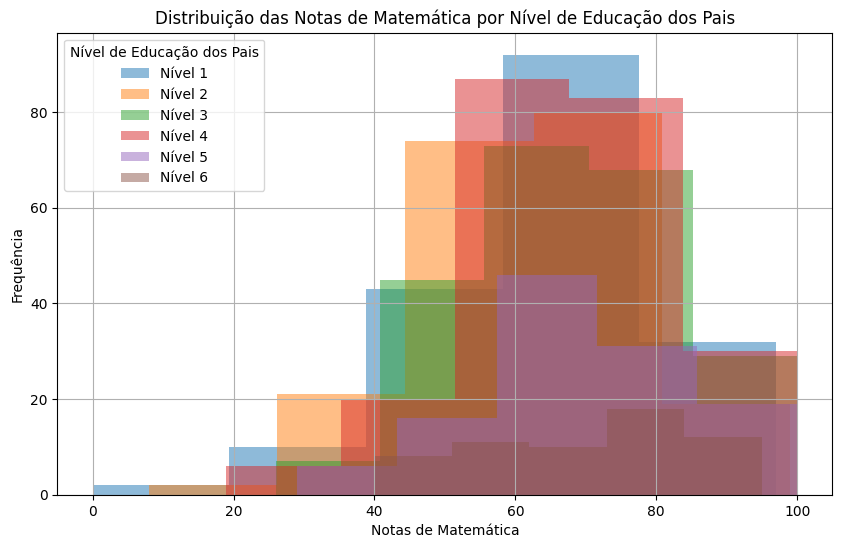

In [ ]:
# Criando o histograma
plt.figure(figsize=(10, 6))
for level in sorted(df_educacao_parental.unique()):
    subset = df[df_educacao_parental == level]
    plt.hist(subset['nota de matemática'], bins=5, alpha=0.5, label=f'Nível {level}')

plt.title('Distribuição das Notas de Matemática por Nível de Educação dos Pais')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.legend(title='Nível de Educação dos Pais')
plt.grid(True)
plt.show()

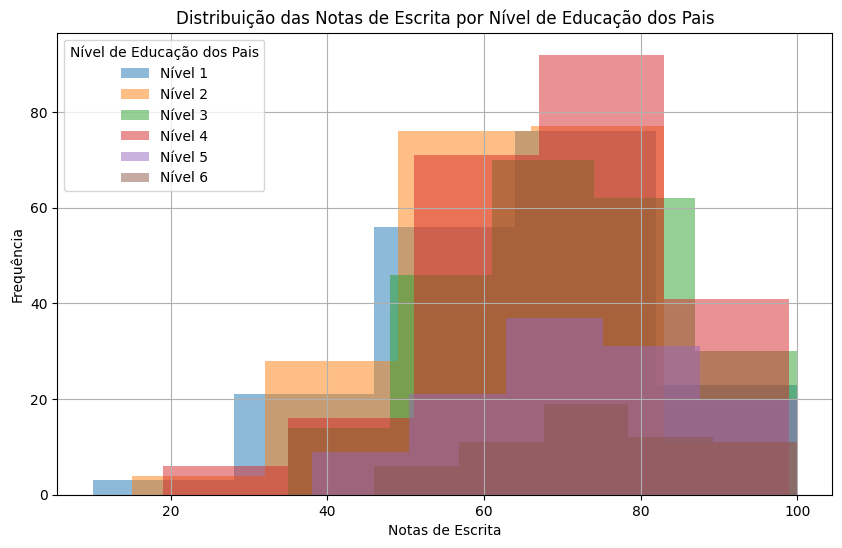

In [ ]:
# Criando o histograma
plt.figure(figsize=(10, 6))
for level in sorted(df_educacao_parental.unique()):
    subset = df[df_educacao_parental == level]
    plt.hist(subset['nota de escrita'], bins=5, alpha=0.5, label=f'Nível {level}')

plt.title('Distribuição das Notas de Escrita por Nível de Educação dos Pais')
plt.xlabel('Notas de Escrita')
plt.ylabel('Frequência')
plt.legend(title='Nível de Educação dos Pais')
plt.grid(True)
plt.show()

###Plotar em gráfico para verificar Medianas e possíveis outliers

<Axes: >

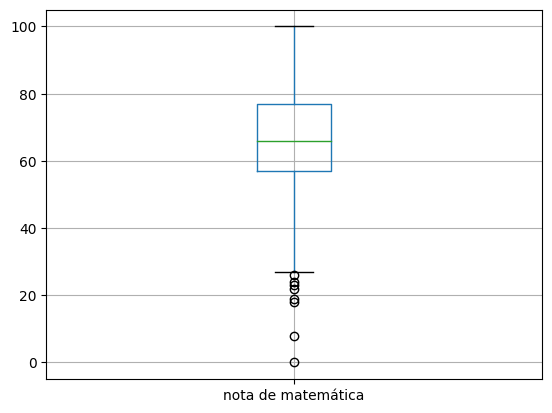

In [ ]:
df.boxplot(column='nota de matemática')

<Axes: >

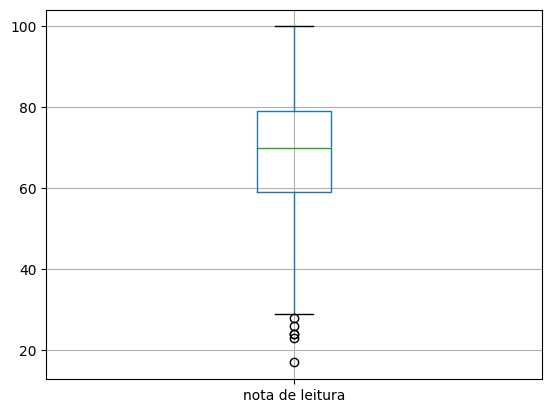

In [ ]:
df.boxplot(column='nota de leitura')

<Axes: >

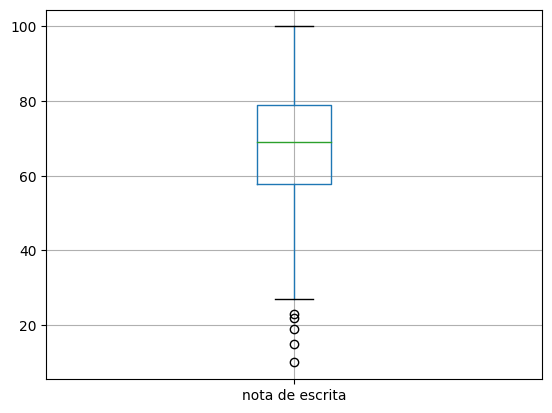

In [ ]:
df.boxplot(column='nota de escrita')

## Atividade extra

###Análise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha.

### Histograma das notas de **leitura e escrita**

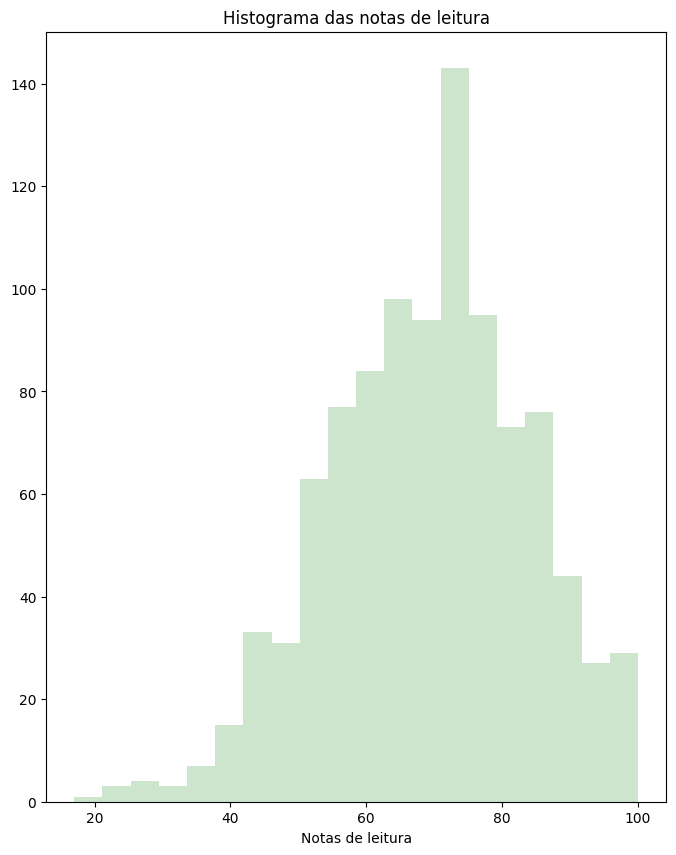

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df['nota de leitura'], bins=20, color='green', alpha=0.2, label='nota de leitura')
plt.xlabel('Notas de leitura')
plt.title('Histograma das notas de leitura')
plt.show()

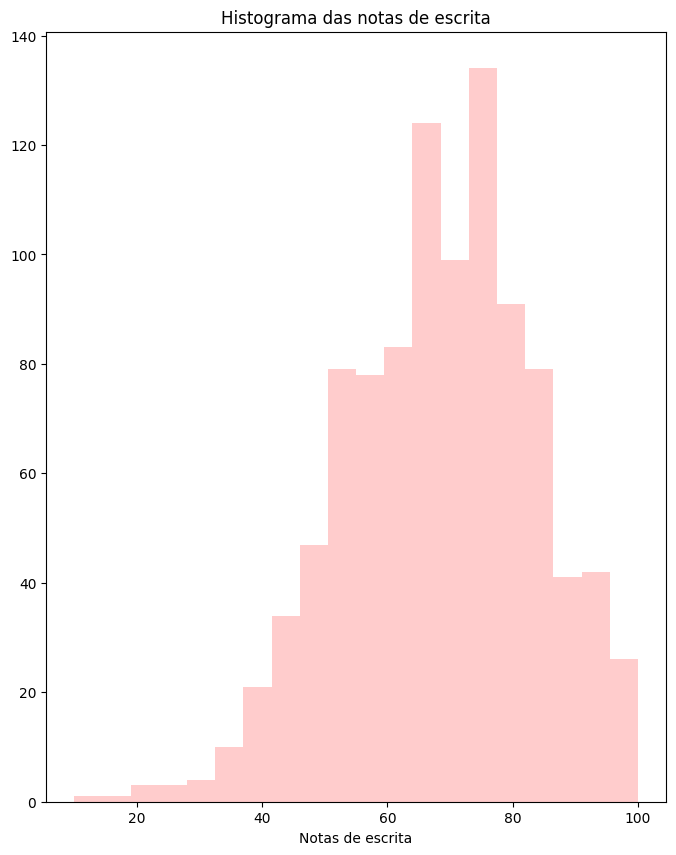

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df['nota de escrita'], bins=20, color='red', alpha=0.2, label='nota de escrita')
plt.xlabel('Notas de escrita')
plt.title('Histograma das notas de escrita')
plt.show()

### Gráfico em barras com as médias das notas de **leitura e escrita** por gênero

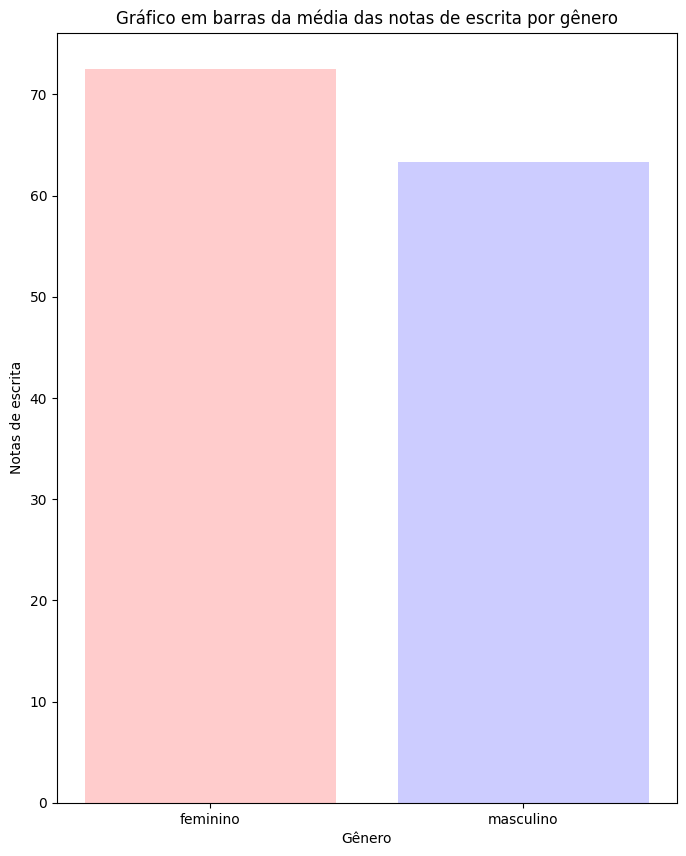

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

media_esc_genero = df.groupby(['gênero'])[['nota de escrita']].mean()
media_esc_genero_labels = media_esc_genero.index
media_notas = media_esc_genero.values.flatten()
plt.bar(media_esc_genero_labels, media_notas, alpha=0.2, color=['red', 'blue'])
plt.title('Gráfico em barras da média das notas de escrita por gênero')
plt.ylabel('Notas de escrita')
plt.xlabel('Gênero')
plt.show()

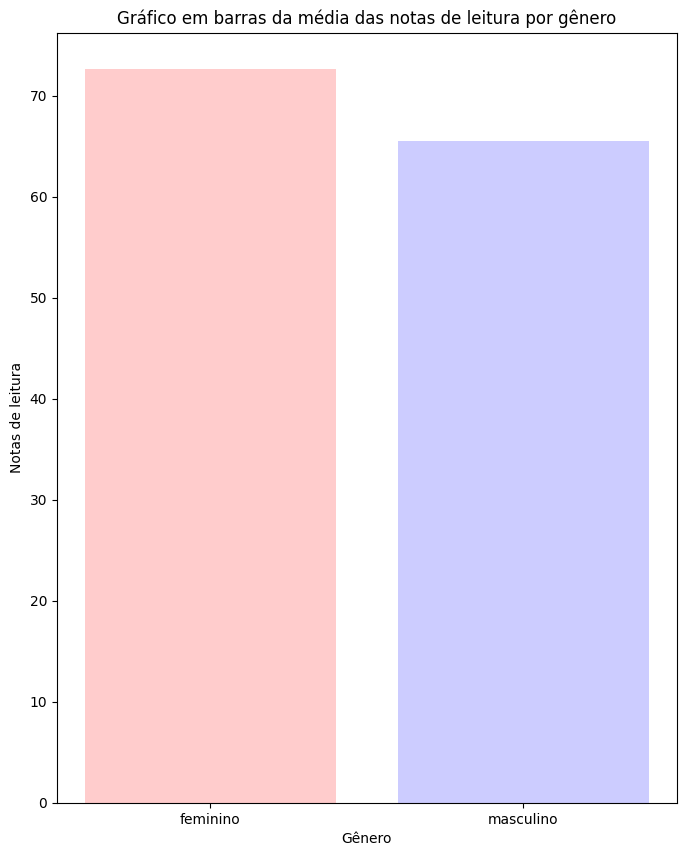

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

media_leit_genero = df.groupby(['gênero'])[['nota de leitura']].mean()
media_labels = media_leit_genero.index
media_notas = media_leit_genero.values.flatten()
plt.bar(media_labels, media_notas, alpha=0.2, color=['red', 'blue'])
plt.title('Gráfico em barras da média das notas de leitura por gênero')
plt.ylabel('Notas de leitura')
plt.xlabel('Gênero')
plt.show()

### Grafico em barras com as médias das notas de **leitura e escrita** por curso preparatório.

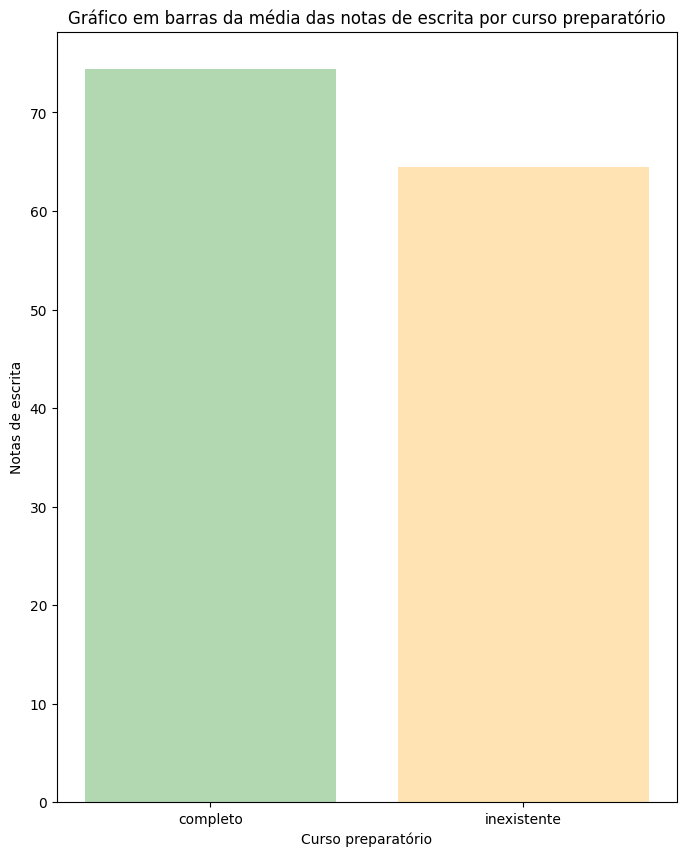

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

media_esc_genero = df.groupby(['curso preparatório para teste'])[['nota de escrita']].mean()
media_esc_genero_labels = media_esc_genero.index
media_notas = media_esc_genero.values.flatten()
plt.bar(media_esc_genero_labels, media_notas, alpha=0.3, color=['green', 'orange'])
plt.title('Gráfico em barras da média das notas de escrita por curso preparatório')
plt.ylabel('Notas de escrita')
plt.xlabel('Curso preparatório')
plt.show()

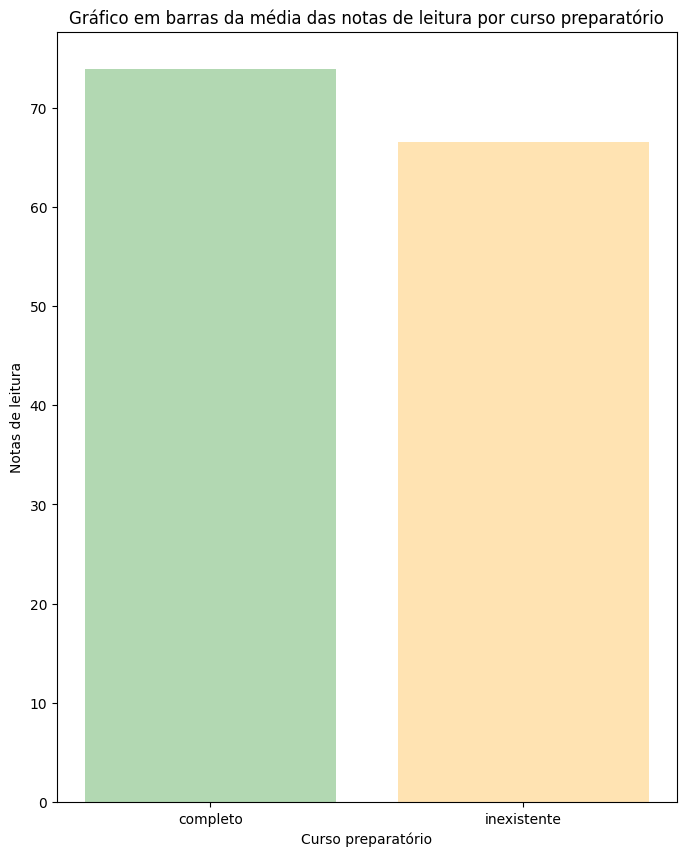

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]

media_leit_genero = df.groupby(['curso preparatório para teste'])[['nota de leitura']].mean()
media_leit_genero_labels = media_leit_genero.index
media_notas = media_leit_genero.values.flatten()
plt.bar(media_leit_genero_labels, media_notas, alpha=0.3, color=['green', 'orange'])
plt.title('Gráfico em barras da média das notas de leitura por curso preparatório')
plt.ylabel('Notas de leitura')
plt.xlabel('Curso preparatório')
plt.show()